日本周辺の過去の震源分布を Python / Plotly で３次元表示するプログラムを作成しました。
(データは USGS のサイトからダウンロードしたものを使用。)



In [ ]:
## 日本周辺の震源分布を Python / Plotly で３次元表示 ##

# データは USGS のサイトからCSV形式でダウンロードしてリネームしたものを読み込んでいる  
# https://earthquake.usgs.gov/earthquakes/search/

import numpy as np
import plotly.graph_objs as go
import plotly.offline as po
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#深さごとに色を変えるためのカラーマップ
colormap = plt.cm.jet_r(np.linspace(0, 1, 100))

po.init_notebook_mode(connected=False)
eye=dict(x=0, y=-1.1, z=1)

# 緯度経度で範囲を指定する
north = 45.595
south = 29.855
east = 147.393
west = 128.32

#データ読み込み
df = pd.read_csv('earthquake-1960-2010.csv')

#データポイントの深さごとに色を決める
z=df['depth']
cd=np.int8(np.floor(z/np.max(z)*99))
cm=colormap[cd]


data=[]
#震源をプロット
data.append(go.Scatter3d(x=df["longitude"], y=df["latitude"], z=-df["depth"], opacity=1 ,  # x軸,y軸,z軸を指定
              mode="markers", marker=dict(size=1.5**(df["mag"]-3.4),color=cm)  ,line=dict(width=0.2,color='#a02020')))

#100kmごとに四角の枠を描く
for i in range(7):
    data.append(go.Scatter3d(x=[west,west,east,east,west], y=[north,south,south,north,north], z=-i*np.array([100,100,100,100,100]), opacity=0.5,
            mode="lines",line=dict(width=2,color='#d0d0d0')))
#深さの目盛りを表示
data.append(go.Scatter3d(x=np.ones(7)*east, y=np.ones(7)*south, z=np.arange(0,-601,-100), opacity=1,
            mode="text",text=['0','100','200','300','400','500','600'],textfont=dict(color='#d0d0d0'),textposition='middle center'))

# 地図の表示
m = Basemap(llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east,resolution='i')
#海岸線の座標データを取り出してplot
for pg in m.coastpolygons: 
    data.append(go.Scatter3d(x=pg[0], y=pg[1], z=np.array(pg[0])*0, opacity=0.8,
                    mode="lines",line=dict(width=2,color='#e0e0e0')))

layout = go.Layout(
        margin=dict(
            l=0,r=0,b=0,t=0
        ),
        scene=dict(aspectmode='manual',aspectratio=dict(x=1,y=1,z=0.25),xaxis=dict(visible=False),yaxis=dict(visible=False),zaxis=dict(visible=False),
                 camera = dict( up=dict(x=0, y=0, z=1),center=dict(x=0, y=0, z=0),eye=eye) ,hovermode=False),
        showlegend=False,
        paper_bgcolor='#101040'
    )
fig = go.Figure(data=data, layout=layout)
po.iplot(fig)  

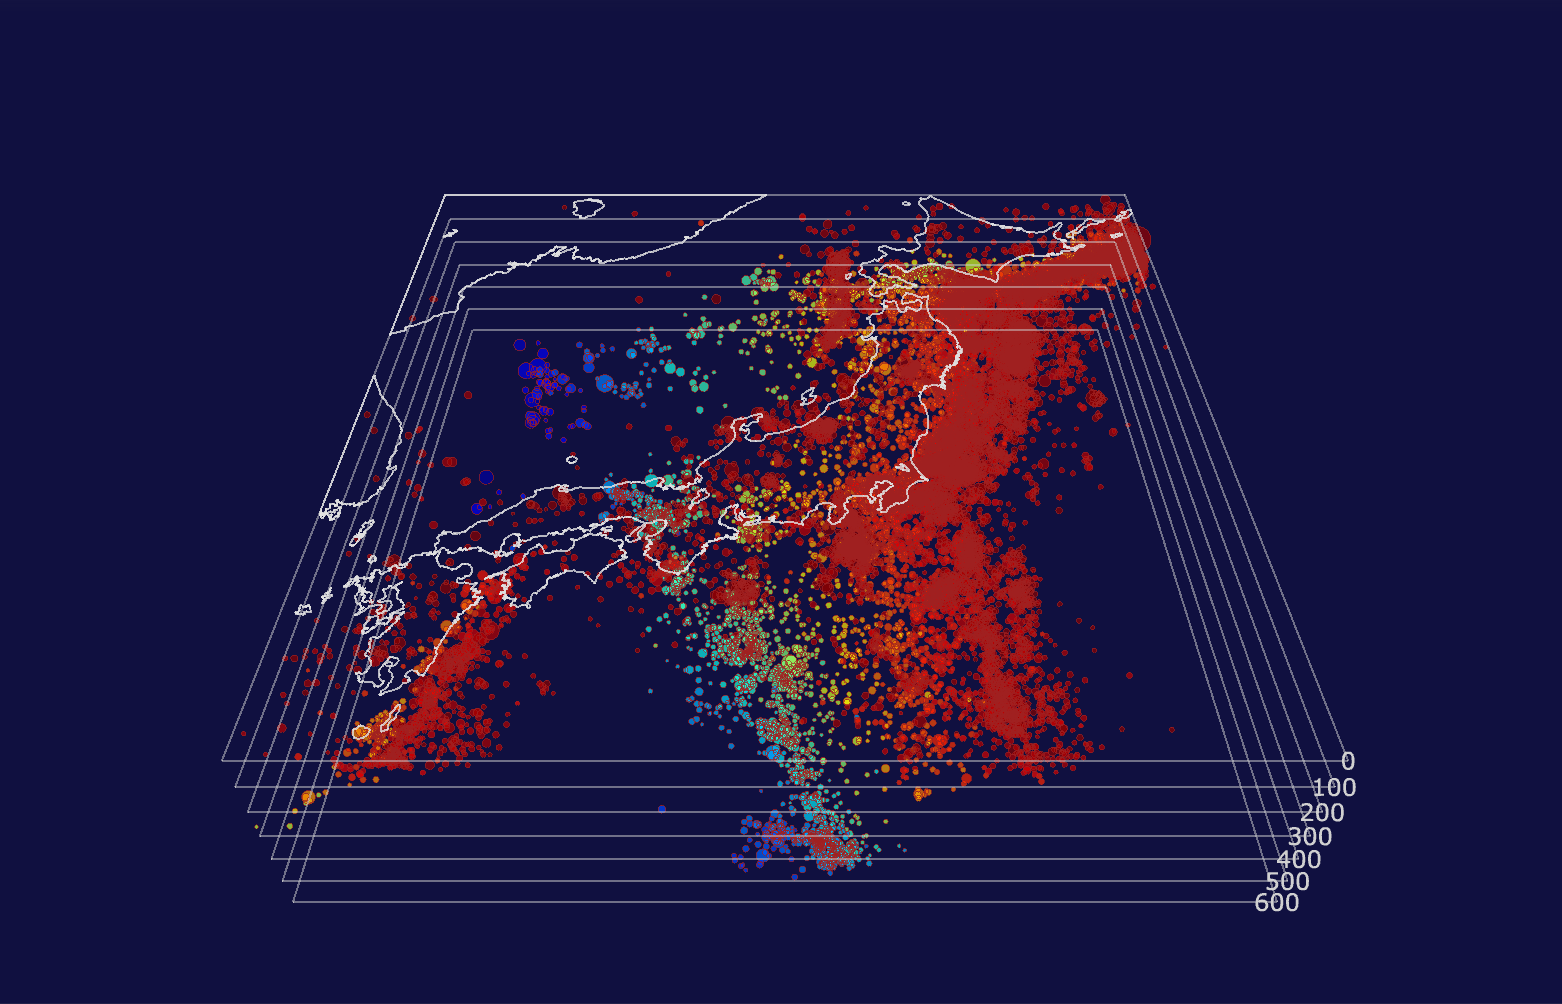

In [2]:
#上のcellの出力をpng画像に変換したものを表示しておく
from PIL import Image
Image.open('earthquake.png')